## Accessing data

In [1]:
pip install sentinelsat

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sentinelsat import SentinelAPI

user = 'Enter Username' 
password = 'Enter Password' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')
api

In [3]:
import geopandas as gpd
import folium 

In [4]:


nReserve = gpd.read_file('C:/Users/Jean Paul/Downloads/map (2).geojson')

m = folium.Map([-18.6696553 ,35.5273354], zoom_start=12)
folium.GeoJson(nReserve).add_to(m)
m

In [5]:
from shapely.geometry import MultiPolygon, Polygon

footprint = None
for i in nReserve['geometry']:
    footprint = i

In [5]:
products = api.query(footprint,
                     date = ('20191015', '20201101'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,50)
                    )

Querying products:  22%|##2       | 100/452 [00:00<?, ?product/s]

In [6]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry
f52dbf46-79fd-4e4e-837f-929bd0f042e6,S2B_MSIL2A_20191130T074159_N0213_R092_T36KWF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-30T07:41:59.024Z, Instrument: MS...",false,2019-11-30 07:41:59.024,2019-11-30 07:41:59.024,2019-11-30 17:18:24.754,14275,...,35.10 MB,GS2B_20191130T074159_014275_N02.13,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20191130T074159_N0213_R092_T36KWF_2...,f52dbf46-79fd-4e4e-837f-929bd0f042e6,"MULTIPOLYGON (((34.03269 -17.24876, 34.03230 -..."
a73c154e-561d-4a34-8ef6-59ff1f9187f9,S2B_MSIL2A_20191130T074159_N0213_R092_T36KXG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-30T07:41:59.024Z, Instrument: MS...",false,2019-11-30 07:41:59.024,2019-11-30 07:41:59.024,2019-11-30 20:00:24.487,14275,...,136.97 MB,GS2B_20191130T074159_014275_N02.13,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20191130T074159_N0213_R092_T36KXG_2...,a73c154e-561d-4a34-8ef6-59ff1f9187f9,"MULTIPOLYGON (((33.94080 -17.27119, 34.84039 -..."
4491b1e1-6b2f-4c28-a5ef-c80110ed0c30,S2B_MSIL2A_20191107T073019_N0213_R049_T36KXE_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-07T07:30:19.024Z, Instrument: MS...",false,2019-11-07 07:30:19.024,2019-11-07 07:30:19.024,2019-11-07 17:15:42.469,13946,...,676.47 MB,GS2B_20191107T073019_013946_N02.13,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20191107T073019_N0213_R049_T36KXE_2...,4491b1e1-6b2f-4c28-a5ef-c80110ed0c30,"MULTIPOLYGON (((34.29524 -19.07571, 34.99387 -..."
b79a0b5f-6867-4c04-b732-81cfcba2a5ad,S2A_MSIL2A_20200513T073621_N0214_R092_T36KXF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-05-13T07:36:21.024Z, Instrument: MS...",false,2020-05-13 07:36:21.024,2020-05-13 07:36:21.024,2020-05-13 18:45:19.425,25543,...,1.06 GB,GS2A_20200513T073621_025543_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200513T073621_N0214_R092_T36KXF_2...,b79a0b5f-6867-4c04-b732-81cfcba2a5ad,"MULTIPOLYGON (((33.94552 -18.17460, 34.84811 -..."
a646b405-c67a-436f-9ada-7e0ec64e7365,S2B_MSIL2A_20201002T072729_N0214_R049_T36KXF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-10-02T07:27:29.024Z, Instrument: MS...",false,2020-10-02 07:27:29.024,2020-10-02 07:27:29.024,2020-10-02 15:09:48.024,18665,...,398.75 MB,GS2B_20201002T072729_018665_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20201002T072729_N0214_R049_T36KXF_2...,a646b405-c67a-436f-9ada-7e0ec64e7365,"MULTIPOLYGON (((34.51238 -18.17028, 34.98336 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e005fff-ba76-40a0-8c2f-c326c59bd493,S2A_MSIL2A_20200104T074311_N0213_R092_T36KWE_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-01-04T07:43:11.024Z, Instrument: MS...",false,2020-01-04 07:43:11.024,2020-01-04 07:43:11.024,2020-01-04 13:06:38.419,23684,...,1.04 GB,GS2A_20200104T074311_023684_N02.13,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200104T074311_N0213_R092_T36KWE_2...,9e005fff-ba76-40a0-8c2f-c326c59bd493,"MULTIPOLYGON (((32.99981 -19.08091, 34.04348 -..."
72404918-

In [7]:
print(len(products))

452


<AxesSubplot:>

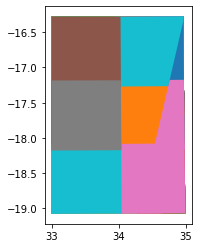

In [8]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

In [9]:
areas.uuid

6753e849-18ff-4767-a046-97b637100181    6753e849-18ff-4767-a046-97b637100181
8ea21d7c-a451-455d-944f-a49a9876d883    8ea21d7c-a451-455d-944f-a49a9876d883
784a9688-9046-40b9-ab8a-b1921b331354    784a9688-9046-40b9-ab8a-b1921b331354
dc3a2dd7-3fbb-4737-b9f1-d354123ac8fc    dc3a2dd7-3fbb-4737-b9f1-d354123ac8fc
66d5b923-fc7b-4015-a892-6c03c2675664    66d5b923-fc7b-4015-a892-6c03c2675664
                                                        ...                 
8b00845d-bdfb-4c57-bf05-70c71ff16bdc    8b00845d-bdfb-4c57-bf05-70c71ff16bdc
0c0b22bc-47d2-43ad-a3df-d7c69e166563    0c0b22bc-47d2-43ad-a3df-d7c69e166563
b8e8d794-32c7-4761-8022-078367284f1e    b8e8d794-32c7-4761-8022-078367284f1e
a2f90751-8f40-4fdf-b080-0949463feb76    a2f90751-8f40-4fdf-b080-0949463feb76
c692a03a-9ceb-480c-9657-efb2f82b8ce3    c692a03a-9ceb-480c-9657-efb2f82b8ce3
Name: uuid, Length: 452, dtype: object

In [10]:
#check online api's
def checkProductID():
    for i in range(len(products_gdf['uuid'])):
        product_id = api.get_product_odata(products_gdf['uuid'][i])
        for j in product_id.keys():
            if j == 'Online':
                print(f"For the index = {i} , the product {products_gdf['uuid'][i]}"
                      f" is online True or False? :  {product_id[j]}")


In [25]:
checkProductID()

For the index = 0 , the product 6753e849-18ff-4767-a046-97b637100181 is online True or False? :  False
For the index = 1 , the product 8ea21d7c-a451-455d-944f-a49a9876d883 is online True or False? :  False
For the index = 2 , the product 784a9688-9046-40b9-ab8a-b1921b331354 is online True or False? :  False
For the index = 3 , the product dc3a2dd7-3fbb-4737-b9f1-d354123ac8fc is online True or False? :  False
For the index = 4 , the product 66d5b923-fc7b-4015-a892-6c03c2675664 is online True or False? :  False
For the index = 5 , the product f2b2784b-217e-43a7-a690-68e2eb476b49 is online True or False? :  False
For the index = 6 , the product 0779991c-d156-451b-9c73-bb616a80e81a is online True or False? :  False
For the index = 7 , the product f959aee1-12e1-42ca-9301-7f58fb86bbe6 is online True or False? :  False
For the index = 8 , the product eb21a0d3-e505-4623-9b72-50398df243bd is online True or False? :  False
For the index = 9 , the product 03e63a3d-41ce-44f1-a16b-6f6396b14a9f is o

For the index = 79 , the product 0baf5cc6-e23f-47d0-806e-ab2ace9d9688 is online True or False? :  False
For the index = 80 , the product b3ed14b9-7fb5-4eb0-9cd8-5b109c443855 is online True or False? :  False
For the index = 81 , the product 1f43b33e-9bfb-4235-9bb1-1d48a98092f7 is online True or False? :  False
For the index = 82 , the product 56368a89-c0ba-430e-855d-fc8ff8fd22ea is online True or False? :  False
For the index = 83 , the product 5ceba947-ac50-4746-9a4b-2296eeb7bac6 is online True or False? :  False
For the index = 84 , the product ce84158c-509c-4376-a91e-f6547fdb19c2 is online True or False? :  False
For the index = 85 , the product 4644d5b8-e3b5-4bb3-ae06-84a82ae2bcb4 is online True or False? :  False
For the index = 86 , the product f0cdfd49-5503-49a3-8819-7e2561acd564 is online True or False? :  False
For the index = 87 , the product 726d2dc8-0afe-4406-92bf-c6db12c4ee01 is online True or False? :  False
For the index = 88 , the product d496f23a-feda-49a2-92a3-d5b600e

For the index = 158 , the product 889aba8e-89a8-4247-b9bb-e00a2b91ae0b is online True or False? :  False
For the index = 159 , the product 8010fe6e-847f-47b8-8a87-4e6768d6c54b is online True or False? :  False
For the index = 160 , the product e0ee8d94-29ee-48ed-9ce0-72bfe3e0adc1 is online True or False? :  False
For the index = 161 , the product 84bb9b2d-dc52-488d-8efd-78f1b9cdad5c is online True or False? :  False
For the index = 162 , the product bbcabfce-2834-4ef9-9ca5-6c1a57fe2774 is online True or False? :  False
For the index = 163 , the product 54e5298d-5a88-41da-a135-0f6c2f9103bb is online True or False? :  False
For the index = 164 , the product e1948b70-7db7-4225-a0a6-bada7f7573d9 is online True or False? :  False
For the index = 165 , the product c3c749d4-8439-4ff2-a267-f494e3e4469d is online True or False? :  False
For the index = 166 , the product 24dcadd9-d42d-4f0b-9784-89ced51d0475 is online True or False? :  False
For the index = 167 , the product c04bef43-0ef5-4ed8-a5

For the index = 237 , the product 29840e49-8dd0-4478-9076-a239099a0b53 is online True or False? :  False
For the index = 238 , the product 4832a39c-55c7-4a38-91c5-68d3a2f0c44a is online True or False? :  False
For the index = 239 , the product 7bf9361f-bd0f-43ce-ad97-779f7ae17d3b is online True or False? :  False
For the index = 240 , the product d558088f-f5c7-4920-9649-06769e764218 is online True or False? :  False
For the index = 241 , the product a60d426a-cd17-49e0-b581-44247d5fd8f5 is online True or False? :  False
For the index = 242 , the product cf783a54-a752-4315-a62d-26004a115c78 is online True or False? :  False
For the index = 243 , the product 999543e5-2d63-4c45-be22-6a64913848cf is online True or False? :  False
For the index = 244 , the product a1401f20-d652-4a67-9ee2-31c6e2da4116 is online True or False? :  False
For the index = 245 , the product 884d9895-6bfe-4c57-b43b-763a0acb181f is online True or False? :  False
For the index = 246 , the product 5f2a7f4e-7db7-4268-ba

For the index = 316 , the product 9e2b990a-957a-4791-bc2b-ee4f46837a50 is online True or False? :  False
For the index = 317 , the product ff310a1e-062a-46ca-939b-19ac718ec83f is online True or False? :  False
For the index = 318 , the product 466240d2-2694-44be-8b66-8c048225fd47 is online True or False? :  False
For the index = 319 , the product 2a77342f-e645-4537-b185-1170ffaeab3d is online True or False? :  False
For the index = 320 , the product 2e2ad857-e786-4e83-bce6-07ee7d116e42 is online True or False? :  False
For the index = 321 , the product 97b80779-46d2-4471-b9b1-467cfb647c93 is online True or False? :  False
For the index = 322 , the product 5d4c5456-02d4-4077-9a58-7d36ae2472d4 is online True or False? :  False
For the index = 323 , the product 4d322b6d-6720-48ba-a27a-b8adfac556f3 is online True or False? :  False
For the index = 324 , the product 82951976-5452-4458-83a2-cf4ad3ab3eb4 is online True or False? :  False
For the index = 325 , the product 4466be00-7e22-4b75-aa

For the index = 395 , the product 85165172-9279-4e27-b3cf-d06b8c7a64ba is online True or False? :  False
For the index = 396 , the product 840f5ee5-05c5-4f03-888c-c09dc3fa75a8 is online True or False? :  False
For the index = 397 , the product a73c154e-561d-4a34-8ef6-59ff1f9187f9 is online True or False? :  False
For the index = 398 , the product 76c9ea56-9359-4dd1-9530-da48eb1d7ad7 is online True or False? :  False
For the index = 399 , the product 33524335-9ade-486b-adb6-0ce6dcfb240b is online True or False? :  False
For the index = 400 , the product 3eda9438-55e9-4ce1-bb8f-d338644781b1 is online True or False? :  False
For the index = 401 , the product f52dbf46-79fd-4e4e-837f-929bd0f042e6 is online True or False? :  True
For the index = 402 , the product 5e673088-fea1-4266-8010-db09cf2d8ac8 is online True or False? :  False
For the index = 403 , the product 6bc0b375-0300-4615-8467-1952f5a10c3f is online True or False? :  False
For the index = 404 , the product a5a2596a-bd78-4a3f-881

In [29]:
api.get_product_odata('d7938d0f-6941-4654-91ef-123b27cefc61')

{'id': 'd7938d0f-6941-4654-91ef-123b27cefc61',
 'title': 'S2A_MSIL2A_20191026T074011_N0213_R092_T36KXE_20191026T102603',
 'size': 970566233,
 'md5': '96077a3f0a6e63bcf155d23b53beb8ee',
 'date': datetime.datetime(2019, 10, 26, 7, 40, 11, 24000),
 'footprint': 'POLYGON((34.872121757951454 -18.07918167322288,34.870739985143565 -18.085269139107243,34.83700051508161 -18.23356916689403,34.80318606526728 -18.381878044647387,34.769328824919285 -18.530273079593847,34.73552074857087 -18.67869452728075,34.701570364825045 -18.827065854400665,34.66777200218391 -18.97535280774408,34.64543904036942 -19.072910147935563,33.950531626201396 -19.078459430248184,33.94504598188942 -18.086213891930853,34.872121757951454 -18.07918167322288))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('d7938d0f-6941-4654-91ef-123b27cefc61')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 10, 26, 14, 0, 13, 672000),
 'Ingestion Date': datetime.datetime(2019, 10, 26, 13, 59, 13, 880000),
 

In [30]:
api.download('d7938d0f-6941-4654-91ef-123b27cefc61')

MD5 checksumming:   0%|          | 0.00/971M [00:00<?, ?B/s]

{'id': 'd7938d0f-6941-4654-91ef-123b27cefc61',
 'title': 'S2A_MSIL2A_20191026T074011_N0213_R092_T36KXE_20191026T102603',
 'size': 970566233,
 'md5': '96077a3f0a6e63bcf155d23b53beb8ee',
 'date': datetime.datetime(2019, 10, 26, 7, 40, 11, 24000),
 'footprint': 'POLYGON((34.872121757951454 -18.07918167322288,34.870739985143565 -18.085269139107243,34.83700051508161 -18.23356916689403,34.80318606526728 -18.381878044647387,34.769328824919285 -18.530273079593847,34.73552074857087 -18.67869452728075,34.701570364825045 -18.827065854400665,34.66777200218391 -18.97535280774408,34.64543904036942 -19.072910147935563,33.950531626201396 -19.078459430248184,33.94504598188942 -18.086213891930853,34.872121757951454 -18.07918167322288))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('d7938d0f-6941-4654-91ef-123b27cefc61')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 10, 26, 14, 0, 13, 672000),
 'Ingestion Date': datetime.datetime(2019, 10, 26, 13, 59, 13, 880000),
 

# Exploring Satellite Imagery with Rasterio

In [58]:
!pip install plotly
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68734 sha256=32420402b057e7b1bd4a0947809d5ea57c3fc7ed530759e7c8228244ae7bac7f
  Stored in directory: c:\users\jean paul\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [1]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Clip Satellite images

In [2]:
S_sentinel_bands = glob("C:/Users/Jean Paul/Documents/IMG_DATA/R10m/*B?*.jp2")

S_sentinel_bands.sort()

l = []

for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))
    
arr_st = np.stack(l)

In [3]:
S_sentinel_bands

['C:/Users/Jean Paul/Documents/IMG_DATA/R10m\\T36KXE_20191026T074011_B02_10m.jp2',
 'C:/Users/Jean Paul/Documents/IMG_DATA/R10m\\T36KXE_20191026T074011_B03_10m.jp2',
 'C:/Users/Jean Paul/Documents/IMG_DATA/R10m\\T36KXE_20191026T074011_B04_10m.jp2',
 'C:/Users/Jean Paul/Documents/IMG_DATA/R10m\\T36KXE_20191026T074011_B08_10m.jp2']

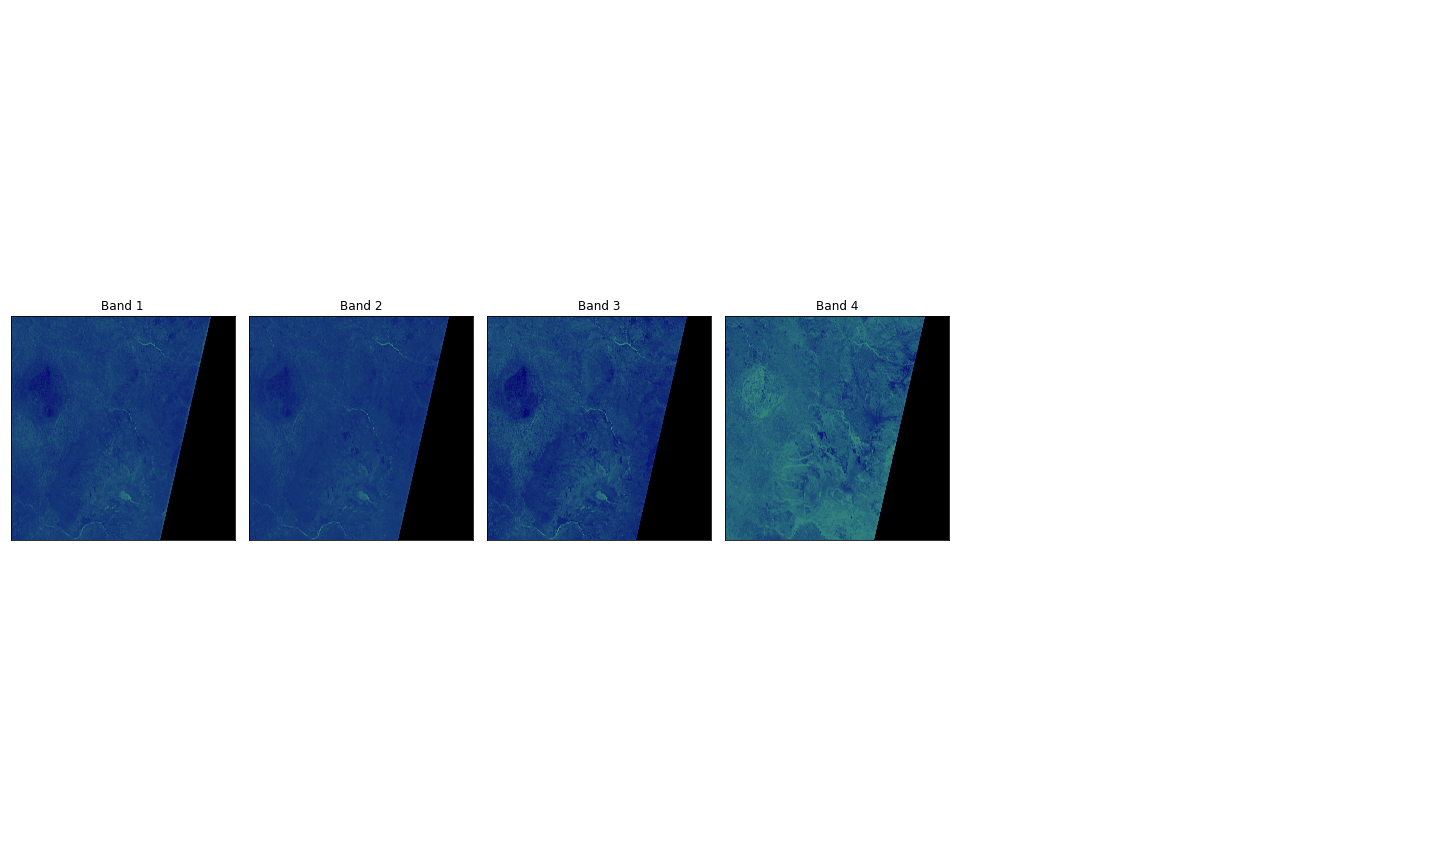

In [4]:
ep.plot_bands(arr_st, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 6, 
              cbar = False)
plt.show()

# Create RGB Image

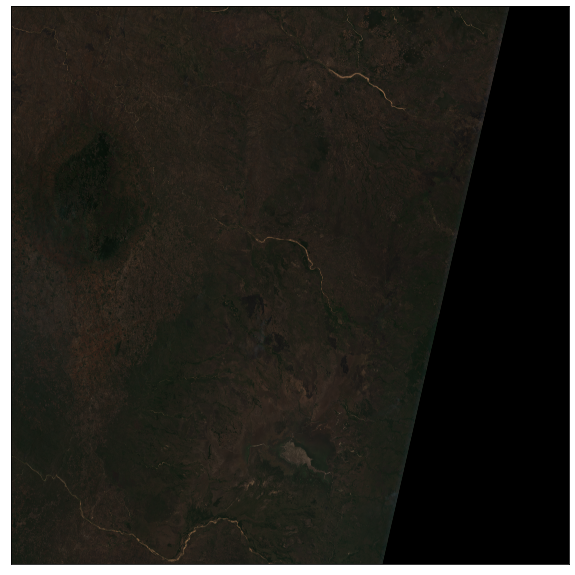

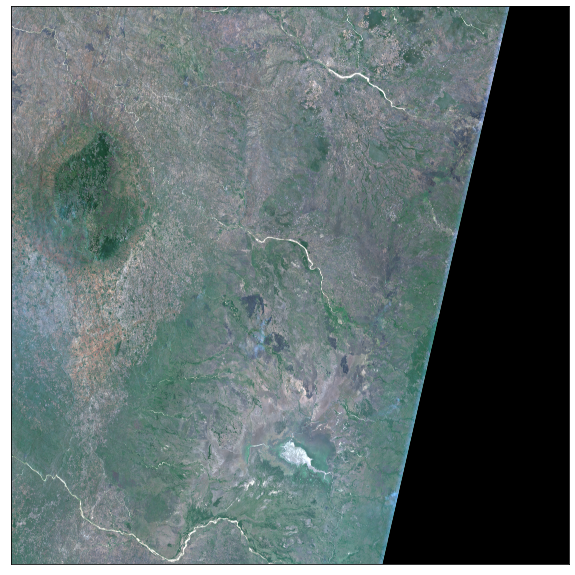

In [5]:
# RGB Composite Image

rgb = ep.plot_rgb(arr_st, 
                  rgb=(2,1,0), 
                  figsize=(10, 16))
plt.show()

# RGB Composite Image with Strech

ep.plot_rgb(arr_st,
            rgb=(2, 1, 0),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

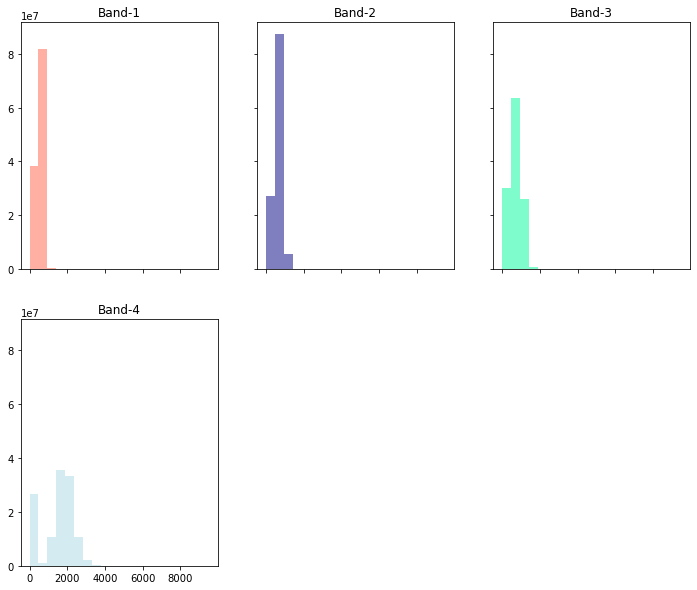

In [6]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
        colors = colors,
        title=[f'Band-{i}' for i in range(1, 5)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10))

plt.show()

# Create NDVI

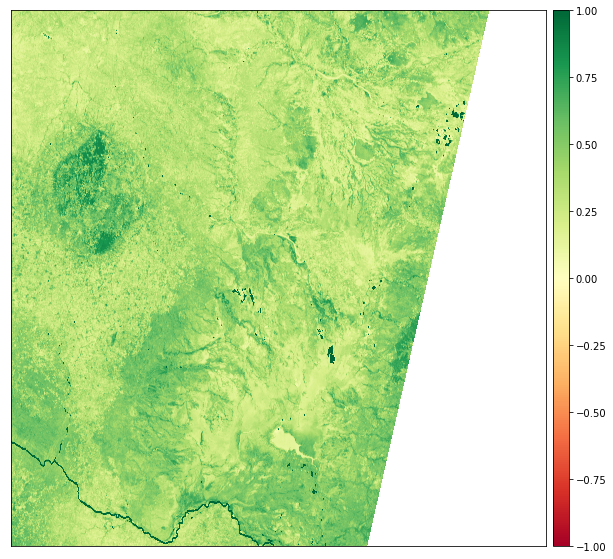

In [7]:
ndvi = es.normalized_diff(arr_st[3 ], arr_st[2])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [29]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

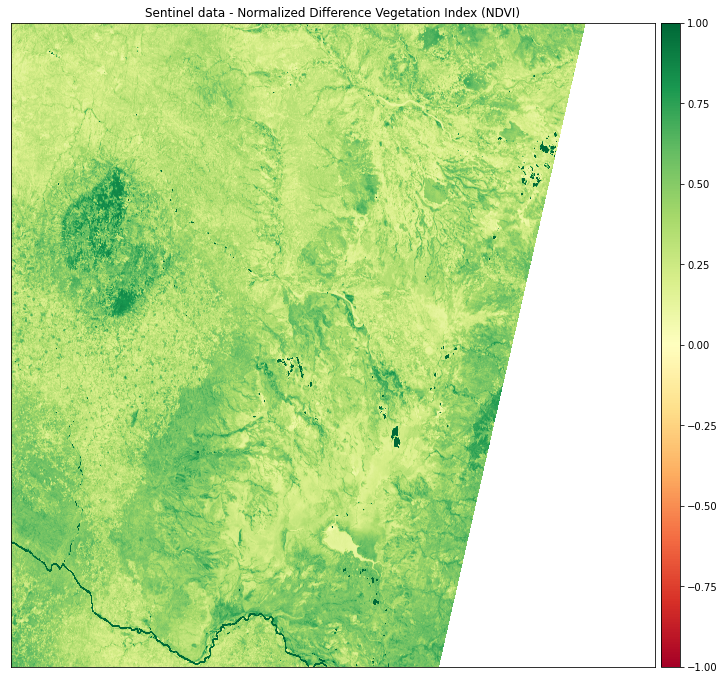

<AxesSubplot:title={'center':'Sentinel data - Normalized Difference Vegetation Index (NDVI)'}>

In [9]:
titles = ["Sentinel data - Normalized Difference Vegetation Index (NDVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

# Classify NDVI


In [10]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[2, 3, 4, 5, --],
             mask=[False, False, False, False,  True],
       fill_value=999999,
            dtype=int64)

In [11]:
ndvi_landsat_class.shape

(10980, 10980)

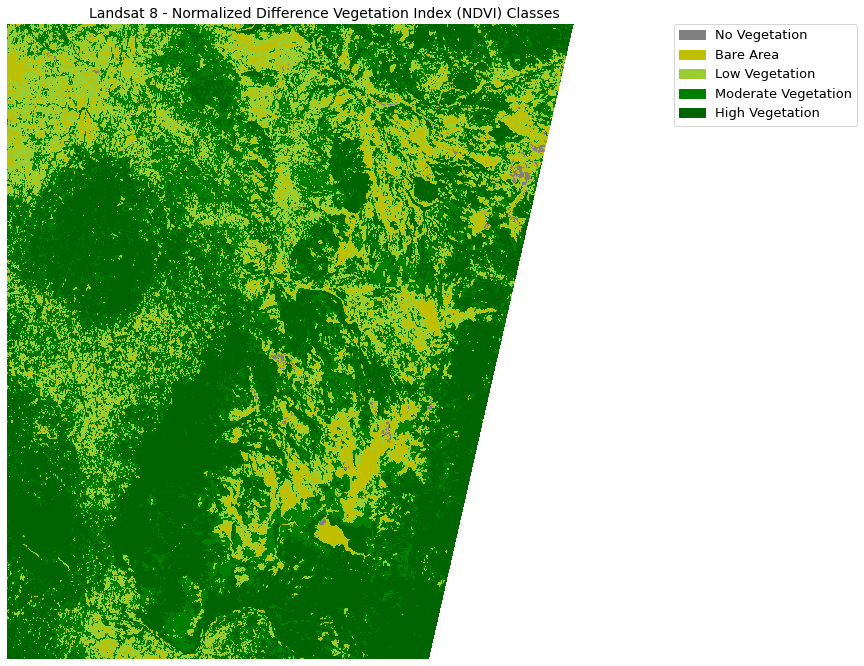

In [12]:
# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

# Visible Atmospherically Resistant Index (VARI)

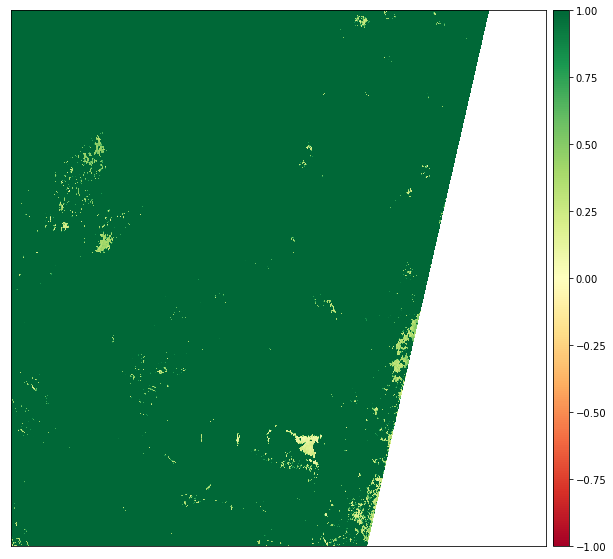

In [14]:
VARI = (arr_st[1 ] - arr_st[2 ])/ (arr_st[1 ] + arr_st[2 ] - arr_st[0 ])
ep.plot_bands(VARI, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()


In [1]:
!pip install rasterio
!pip install ipygee
!pip install tslearn
!pip install earthengine-api
!pip install geopandas

  Created wheel for ipygee: filename=ipygee-0.0.17-py3-none-any.whl size=40380 sha256=28e7c2ec06fd9cb93965429538c3722c245bc81557014b84bde6d2a2485837ea
  Stored in directory: c:\users\jean paul\appdata\local\pip\cache\wheels\20\af\3b\27ea5fb6e7a589b80f54e999b5444aaed9a342dac498d6f14b
  Created wheel for geetools: filename=geetools-0.6.14-py3-none-any.whl size=92105 sha256=626d91dac48b5154e5dfa293047b35a1758a7a324259fd39502e6f98689b4673
  Stored in directory: c:\users\jean paul\appdata\local\pip\cache\wheels\20\4c\bf\0228d788d820ac3cf05cbaa753965eb6396b5d3fe11ed912e5
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=120abcd15838924ebc9a1d53eb84384b8b8c8e10e712da2ab491795a02ae7a0e
  Stored in directory: c:\users\jean paul\appdata\local\pip\cache\wheels\6a\73\a7\3dc684169ab99e26d1e9e25f2a939ea1886209f1b4087b4131
Successfully built ipygee geetools pyshp
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing bu

  ERROR: Command errored out with exit status 2:
   command: 'C:\Users\Jean Paul\.conda\envs\env_ishango\python.exe' 'C:\Users\Jean Paul\AppData\Local\Temp\pip-standalone-pip-0kvt8h12\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\Jean Paul\AppData\Local\Temp\pip-build-env-tefz55j2\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'numpy<=1.19' Cython
       cwd: None
  Complete output (737 lines):
    Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
      Preparing wheel metadata: started
      Preparing wheel metadata: finished with status 'error'
      ERROR: Command errored out with exit status 1:
       command: 'C:\Users\Jean Paul\.conda\envs\env_ishango

  Created wheel for earthengine-api: filename=earthengine_api-0.1.284-py3-none-any.whl size=259800 sha256=13abcb31901959b676a99942b14fdcbc2cb6a6a4d23f0ec69b407e870629bdf5
  Stored in directory: c:\users\jean paul\appdata\local\pip\cache\wheels\b8\14\5f\1eed8b6f93f14c09e7ab7214a9c45c69e200af0d90a8781b2a
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=2fa19769a12b9d608523584716f951b8fc4be9a2dd4b9bd3640d5b4282dd6603
  Stored in directory: c:\users\jean paul\appdata\local\pip\cache\wheels\2f\a0\d3\4030d9f80e6b3be787f19fc911b8e7aa462986a40ab1e4bb94
  Created wheel for httplib2shim: filename=httplib2shim-0.0.3-py2.py3-none-any.whl size=18058 sha256=b2914f21d0a0d914bb6dd98836ee3ab6f39176424a6d5ffb6932d3a23fa60484
  Stored in directory: c:\users\jean paul\appdata\local\pip\cache\wheels\cc\e7\8f\8a433809ef32e27c1f24d80effef7dde1212f72fec13df73aa
Successfully built earthengine-api future httplib2shim


In [3]:
import ee
ee.Authenticate()
ee.Initialize()

Enter verification code: 4/1AX4XfWgooEocY_lXhfxsKSxDPbsEi3ZozS67Yi8dto10B0GRS4ch-J6DZ8I

Successfully saved authorization token.


In [2]:
!pip install tslearn

  Using cached tslearn-0.5.2.tar.gz (484 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'
  Using cached tslearn-0.5.1.0.tar.gz (484 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'
  Using cached tslearn-0.5.0.5.tar.gz (484 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Jean Paul\.conda\envs\env_ishango\python.exe' 'C:\Users\Jean Paul\AppData\Local\Temp\pip-standalone-pip-axixm_13\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\Jean Paul\AppData\Local\Temp\pip-build-env-iklctb0f\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'numpy<=1.19' Cython
       cwd: None
  Complete output (2154 lines):
    Using cached setuptools-58.2.0-py3-none-any.whl (946 kB)
    Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
    Using cached numpy-1.19.0.zip (7.3 MB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
      Preparing wheel metadata: started
      Preparing wheel metadata: finished with status 'error'
      E


  Using cached Cython-0.29.24-cp39-cp39-win_amd64.whl (1.7 MB)
  Using cached numba-0.54.0-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached numpy-1.20.3-cp39-cp39-win_amd64.whl (13.7 MB)
  Using cached llvmlite-0.37.0-cp39-cp39-win_amd64.whl (17.0 MB)
Failed to build tslearn



        NOT AVAILABLE
  
      atlas_blas_threads_info:
      Setting PTATLAS=ATLAS
        libraries ptf77blas,ptcblas,atlas not found in ['C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\lib', 'C:\\', 'C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\libs', 'C:\\Users\\Jean Paul\\anaconda3\\Library\\lib']
        NOT AVAILABLE
  
      atlas_blas_info:
        libraries f77blas,cblas,atlas not found in ['C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\lib', 'C:\\', 'C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\libs', 'C:\\Users\\Jean Paul\\anaconda3\\Library\\lib']
        NOT AVAILABLE
  
      accelerate_info:
        NOT AVAILABLE
  
      C:\Users\Jean Paul\AppData\Local\Temp\pip-install-zg2rm5qw\numpy_d33bf908e5a54e7fa401ea0e57d71278\numpy\distutils\system_info.py:1914: UserWarning:
          Optimized (vendor) Blas libraries are not found.
          Falls back to netlib Blas library which has worse performance.
          A better performance should be easily gained by sw

        libraries f77blas,cblas,atlas not found in C:\
        libraries lapack_atlas not found in C:\Users\Jean Paul\.conda\envs\env_ishango\libs
        libraries f77blas,cblas,atlas not found in C:\Users\Jean Paul\.conda\envs\env_ishango\libs
        libraries lapack_atlas not found in C:\Users\Jean Paul\anaconda3\Library\lib
        libraries f77blas,cblas,atlas not found in C:\Users\Jean Paul\anaconda3\Library\lib
      <class 'numpy.distutils.system_info.atlas_info'>
        NOT AVAILABLE
  
      lapack_info:
        libraries lapack not found in ['C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\lib', 'C:\\', 'C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\libs', 'C:\\Users\\Jean Paul\\anaconda3\\Library\\lib']
        NOT AVAILABLE
  
      C:\Users\Jean Paul\AppData\Local\Temp\pip-install-zg2rm5qw\numpy_7e97a47366b745ff8a5f850d19817069\numpy\distutils\system_info.py:1730: UserWarning:
          Lapack (http://www.netlib.org/lapack/) libraries not found.
          Directorie

        libraries f77blas,cblas,atlas not found in C:\Users\Jean Paul\.conda\envs\env_ishango\libs
        libraries lapack_atlas not found in C:\Users\Jean Paul\anaconda3\Library\lib
        libraries f77blas,cblas,atlas not found in C:\Users\Jean Paul\anaconda3\Library\lib
      <class 'numpy.distutils.system_info.atlas_info'>
        NOT AVAILABLE
  
      lapack_info:
        libraries lapack not found in ['C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\lib', 'C:\\', 'C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\libs', 'C:\\Users\\Jean Paul\\anaconda3\\Library\\lib']
        NOT AVAILABLE
  
      C:\Users\Jean Paul\AppData\Local\Temp\pip-install-zg2rm5qw\numpy_1b26cecfe6d249cf9bc0d3c98c0d9f15\numpy\distutils\system_info.py:1730: UserWarning:
          Lapack (http://www.netlib.org/lapack/) libraries not found.
          Directories to search for the libraries can be specified in the
          numpy/distutils/site.cfg file (section [lapack]) or by setting
          the LAPACK

      - `git clean -xdf` (cleans all files)
      - `git clean -Xdf` (cleans all versioned files, doesn't touch
                          files that aren't checked into the git repo)
  
    Add `--force` to your command to use it anyway if you must (unsupported).
  
    ----------------------------------------
    ERROR: Failed cleaning build dir for numpy
  Failed to build numpy
      Running setup.py install for numpy: started
      Running setup.py install for numpy: finished with status 'error'
      ERROR: Command errored out with exit status 1:
       command: 'C:\Users\Jean Paul\.conda\envs\env_ishango\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Jean Paul\\AppData\\Local\\Temp\\pip-install-zg2rm5qw\\numpy_175df82e0e62445ba9d27e77c9d80ded\\setup.py'"'"'; __file__='"'"'C:\\Users\\Jean Paul\\AppData\\Local\\Temp\\pip-install-zg2rm5qw\\numpy_175df82e0e62445ba9d27e77c9d80ded\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__fi

  
      accelerate_info:
        NOT AVAILABLE
  
      C:\Users\Jean Paul\AppData\Local\Temp\pip-install-wyxnvj7f\numpy_be46fecc9d824d5989b1e1cfe95a6e1c\numpy\distutils\system_info.py:1896: UserWarning:
          Optimized (vendor) Blas libraries are not found.
          Falls back to netlib Blas library which has worse performance.
          A better performance should be easily gained by switching
          Blas library.
        if self._calc_info(blas):
      blas_info:
        libraries blas not found in ['C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\lib', 'C:\\', 'C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\libs', 'C:\\Users\\Jean Paul\\anaconda3\\Library\\lib']
        NOT AVAILABLE
  
      C:\Users\Jean Paul\AppData\Local\Temp\pip-install-wyxnvj7f\numpy_be46fecc9d824d5989b1e1cfe95a6e1c\numpy\distutils\system_info.py:1896: UserWarning:
          Blas (http://www.netlib.org/blas/) libraries not found.
          Directories to search for the libraries can be specified i

      atlas_blas_info:
        libraries f77blas,cblas,atlas not found in ['C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\lib', 'C:\\', 'C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\libs', 'C:\\Users\\Jean Paul\\anaconda3\\Library\\lib']
        NOT AVAILABLE
  
      accelerate_info:
        NOT AVAILABLE
  
      C:\Users\Jean Paul\AppData\Local\Temp\pip-install-wyxnvj7f\numpy_dc8caa635d42401ea45a1b896d4e2cc0\numpy\distutils\system_info.py:1896: UserWarning:
          Optimized (vendor) Blas libraries are not found.
          Falls back to netlib Blas library which has worse performance.
          A better performance should be easily gained by switching
          Blas library.
        if self._calc_info(blas):
      blas_info:
        libraries blas not found in ['C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\lib', 'C:\\', 'C:\\Users\\Jean Paul\\.conda\\envs\\env_ishango\\libs', 'C:\\Users\\Jean Paul\\anaconda3\\Library\\lib']
        NOT AVAILABLE
  
      C:\Users\Jean P

        libraries lapack_atlas not found in C:\Users\Jean Paul\anaconda3\Library\lib
        libraries ptf77blas,ptcblas,atlas not found in C:\Users\Jean Paul\anaconda3\Library\lib
      <class 'numpy.distutils.system_info.atlas_threads_info'>
        NOT AVAILABLE
  
      atlas_info:
        libraries lapack_atlas not found in C:\Users\Jean Paul\.conda\envs\env_ishango\lib
        libraries f77blas,cblas,atlas not found in C:\Users\Jean Paul\.conda\envs\env_ishango\lib
        libraries lapack_atlas not found in C:\
        libraries f77blas,cblas,atlas not found in C:\
        libraries lapack_atlas not found in C:\Users\Jean Paul\.conda\envs\env_ishango\libs
        libraries f77blas,cblas,atlas not found in C:\Users\Jean Paul\.conda\envs\env_ishango\libs
        libraries lapack_atlas not found in C:\Users\Jean Paul\anaconda3\Library\lib
        libraries f77blas,cblas,atlas not found in C:\Users\Jean Paul\anaconda3\Library\lib
      <class 'numpy.distutils.system_info.atlas_info'

In [4]:
import folium
from folium import plugins
from IPython.display import Image
import geopandas as gpd
import json
print(folium.__version__)
from ipygee import*
import math
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

0.12.1


In [6]:
AOI =  ee.Geometry.Polygon(
[[[33.6016845703125,-18.318025732001438],
[34.3157958984375,-18.318025732001438],
[34.3157958984375,-17.748686651728793],
[33.6016845703125,-17.748686651728793]]])
points = ee.FeatureCollection.randomPoints(AOI,100)

In [7]:
months = ee.List.sequence(1,12)
years = ee.List.sequence(2019, 2021)

In [19]:
var dataset = ee.ImageCollection('MODIS/MOD09GA_006_NDVI')
                  .filter(ee.Filter.date('2018-04-01', '2018-06-01'));
var colorized = dataset.select('NDVI');
var colorizedVis = {
  min: 0.0,
  max: 1.0,
  palette: [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
  ],
};
Map.setCenter(-7.03125, 31.0529339857, 2);
Map.addLayer(colorized, colorizedVis, 'Colorized');

SyntaxError: invalid syntax (Temp/ipykernel_6072/2123380997.py, line 1)

In [35]:
MD_NDVI = ee.ImageCollection('MODIS/MOD09GA_006_NDVI')
.filterDate('2016-1-1','2019-12-31')
.filterBounds(AOI).select('NDVI')
modis_ndvi = MD_NDVI.median().clip(AOI)
mean_ndvi = MD_NDVI.mean().clip(AOI)

SyntaxError: invalid syntax (Temp/ipykernel_6072/21981750.py, line 2)

In [32]:
vis_params = {'min': 0, 'max': 1, 'palette': 
['red', 'yellow','green']}
basemaps = {
'Google Maps': folium.TileLayer(
tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
attr = 'Google',
name = 'Google Maps',
overlay = True,
control = True
),
'Google Satellite': folium.TileLayer(
tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
attr = 'Google',
name = 'Google Satellite',
overlay = True,
control = True
)}
def add_ee_layer(self, ee_object, vis_params, name):
 try:
  if isinstance(ee_object, ee.image.Image):
   map_id_dict = ee.Image(ee_object).getMapId(vis_params)
   folium.raster_layers.TileLayer(
   tiles = map_id_dict['tile_fetcher'].url_format,
   attr = 'Google Earth Engine',
   name = name,
   overlay = True,
   control = True
   ).add_to(self)

  elif isinstance(ee_object, ee.imagecollection.ImageCollection):
   ee_object_new = ee_object.mosaic()
   map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
   folium.raster_layers.TileLayer(
   tiles = map_id_dict['tile_fetcher'].url_format,
   attr = 'Google Earth Engine',
   name = name, 
   overlay = True,
   control = True
   ).add_to(self)

  elif isinstance(ee_object, ee.geometry.Geometry):
   folium.GeoJson(
   data = ee_object.getInfo(),
   name = name,
   overlay = True,
   control = True
   ).add_to(self)

  elif isinstance(ee_object,ee.featurecollection.FeatureCollection):
   ee_object_new = ee.Image().paint(ee_object, 0, 2)
   map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
   folium.raster_layers.TileLayer(
   tiles = map_id_dict['tile_fetcher'].url_format,
   attr = 'Google Earth Engine',
   name = name,
   overlay = True,
   control = True
   ).add_to(self)

 except:
  print("Could not display {}".format(name))
folium.Map.add_ee_layer = add_ee_layer
my_map = folium.Map(location=[-13.0912068,-55.9881647],
                    zoom_start=10)
basemaps['Google Maps'].add_to(my_map)
my_map.add_ee_layer(modis_ndvi, vis_params, 'NDVI')
my_map.add_ee_layer(points.geometry(), {}, 'Points')
my_map.add_child(folium.LayerControl())
display(my_map)